In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_mutual_info_score

# for better plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
%matplotlib inline

In [137]:
# read dada1.csv in python with Pandas
data = pd.read_csv('cluster-data.csv', header=0)

# convert the datas in numpy-array 
X = data.as_matrix(columns=None)

# y is the expected
labels = pd.read_csv('cluster-data-class.csv', header=0)
y = labels.as_matrix(columns=None)
y = np.ravel(y)
print('type y: ',type(y))
print('Formato X: {}'.format(X.shape))
print('Formato y: {}'.format(y.shape))

type y:  <class 'numpy.ndarray'>
Formato X: (5417, 3)
Formato y: (5417,)


Para #2 clusters:
Métrica Interna: Silhouette = 0.611942
Métrica Externa: Mutal information = 0.252702
Para #3 clusters:
Métrica Interna: Silhouette = 0.549662
Métrica Externa: Mutal information = 0.436861
Para #4 clusters:
Métrica Interna: Silhouette = 0.497895
Métrica Externa: Mutal information = 0.486548
Para #5 clusters:
Métrica Interna: Silhouette = 0.428067
Métrica Externa: Mutal information = 0.415292
Para #6 clusters:
Métrica Interna: Silhouette = 0.428477
Métrica Externa: Mutal information = 0.417380
Para #7 clusters:
Métrica Interna: Silhouette = 0.430129
Métrica Externa: Mutal information = 0.397152
Para #8 clusters:
Métrica Interna: Silhouette = 0.432447
Métrica Externa: Mutal information = 0.372535
Para #9 clusters:
Métrica Interna: Silhouette = 0.416470
Métrica Externa: Mutal information = 0.351052
Para #10 clusters:
Métrica Interna: Silhouette = 0.358527
Métrica Externa: Mutal information = 0.326851


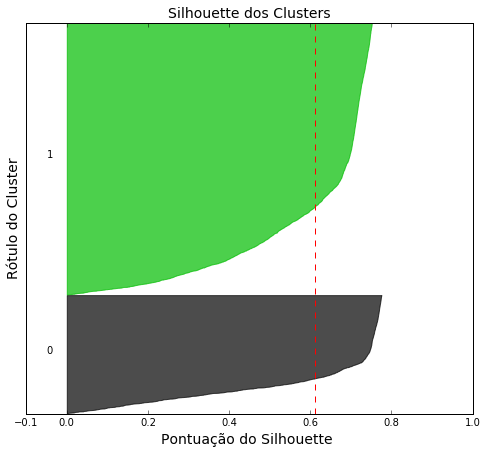

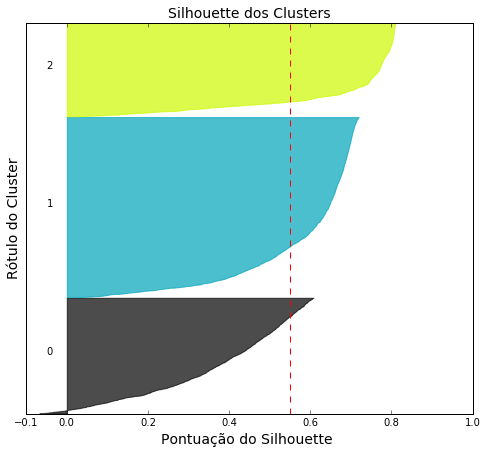

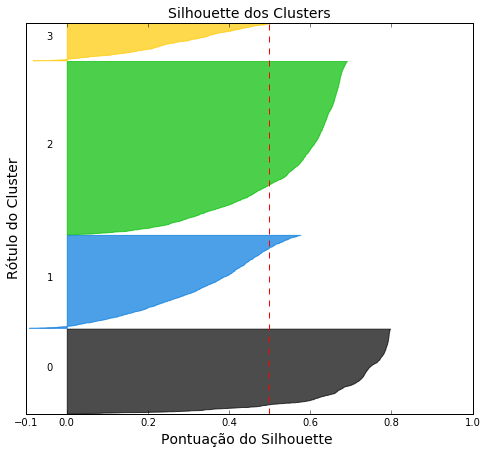

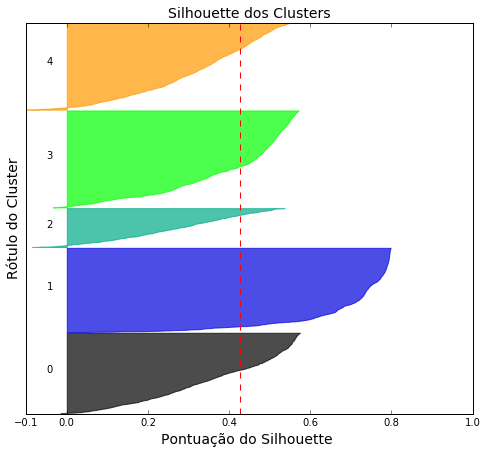

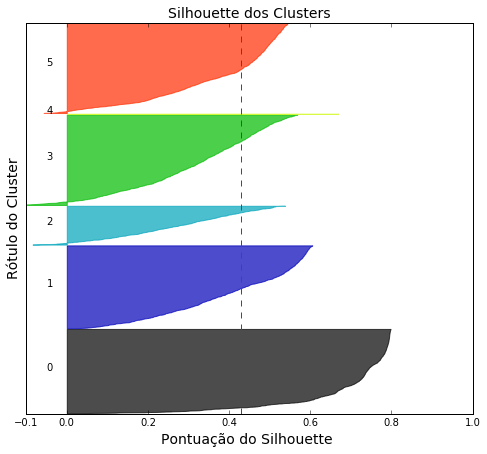

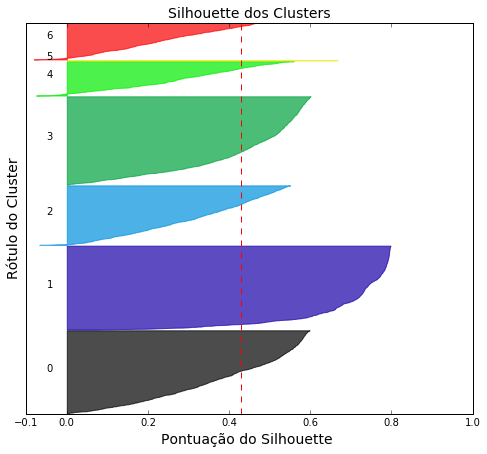

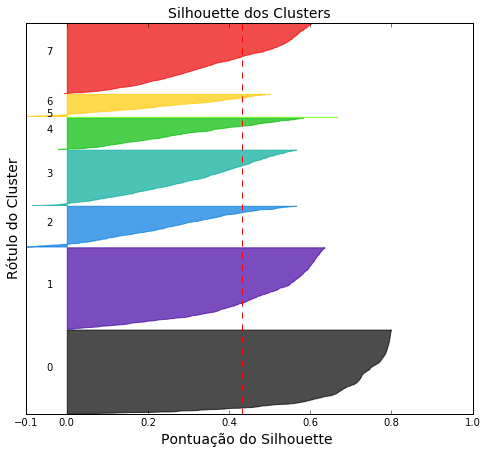

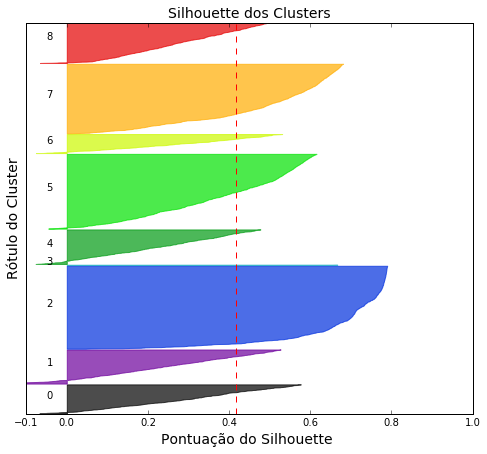

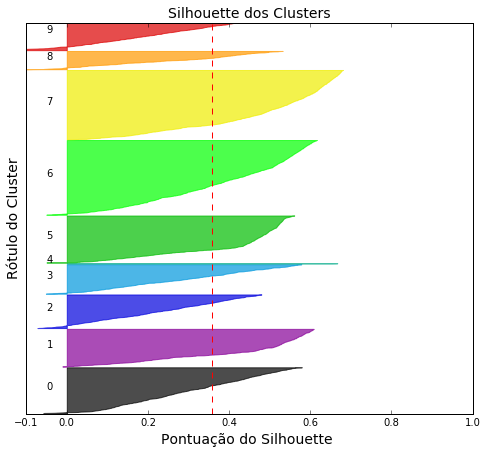

In [142]:
mutual = []
# variandos o k entre 2 e 10
for k in range(2,11):
    # k-means
    km = KMeans(n_clusters=k, n_init=5)
    km_labels = km.fit_predict(X)
    
    # métrica interna Silhouette
    silhouette_avg = silhouette_score(X, km_labels)
    print('Para #%d clusters:\nMétrica Interna: Silhouette = %.6f' % \
          (k, silhouette_avg))
    
    # métrica externa Mutual Information
    metric = adjusted_mutual_info_score(y, km_labels)
    mutual.append(metric)
    print('Métrica Externa: Mutal information = %.6f' % metric)
    
    # plot para a métrica interna Silhouette
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8,7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X)])
    
    # cômputo do Silhouette para cada exemplo
    sample_silhouette_values = silhouette_samples(X, km_labels)
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[km_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label do Silhouette com o número de clusters
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette dos Clusters",  fontsize=14)
    ax1.set_xlabel("Pontuação do Silhouette ",  fontsize=14)
    ax1.set_ylabel("Rótulo do Cluster",  fontsize=14)
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

9


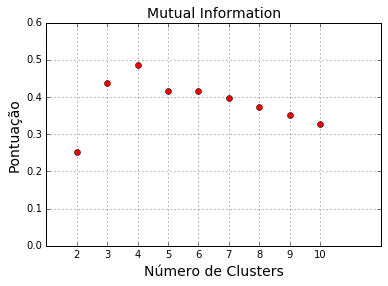

In [144]:
#plot Mutual Information para k entre (2,10)

# ajustando o rótulo do índice do número de clusters
x      = [0  , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8]
labels = ['2','3','4','5','6','7','8','9', '10']

plt.plot(mutual, 'ro')
plt.title('Mutual Information', fontsize=14)
plt.xlabel('Número de Clusters',  fontsize=14)
plt.ylabel('Pontuação' ,  fontsize=14)
plt.margins(0.2)
axes = plt.gca()
axes.set_xlim([-1,10])
axes.set_ylim([0,0.6])
plt.xticks(x, labels)
plt.grid(True)
plt.show()

### Melhor Configuração

In [140]:
# com k=4

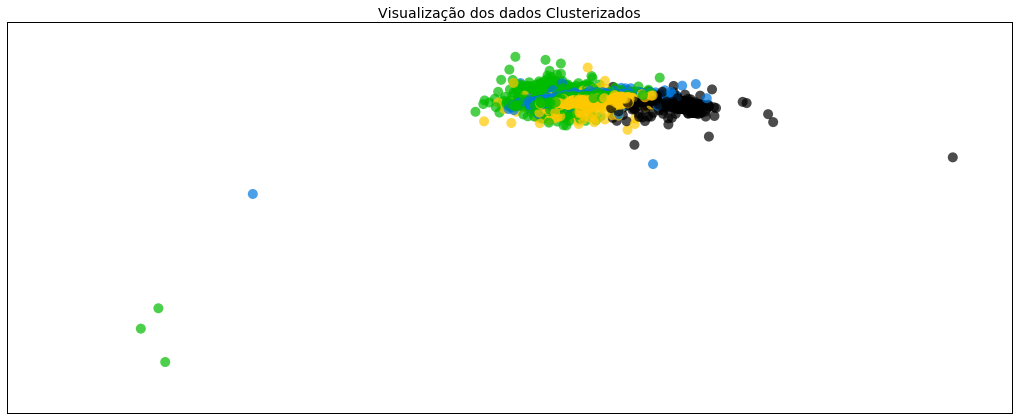

In [145]:
# k-means com k=4
km_new = KMeans(n_clusters=4, n_init=5)
km_labels_new = km_new.fit_predict(X)

# plot
fig, ax = plt.subplots(1)
fig.set_size_inches(18,7)
colors = cm.spectral(km_labels_new.astype(float)/4)
ax.scatter(X[:,0], X[:,1], marker='.', s=400, lw=0, alpha=0.7, c=colors)
ax.set_title('Visualização dos dados Clusterizados', fontsize=14)
plt.xticks([])
plt.yticks([])
plt.show()